In [1]:
import json
import os
from tqdm import tqdm_notebook as tqdm

contexts_fish = []
contexts_tree = []
contexts_sun = []
contexts_salt = []
contexts_stone = []

In [2]:
from nltk.corpus import stopwords
stops = stopwords.words('russian')
print(stops)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [3]:
for w in ['','весь','который','свой']:
    stops.append(w)

In [10]:
def load_texts():
    dirs = os.walk('texts')
    for dirr in dirs:    
        path = dirr[0] + '/'
        files = dirr[2]
        for file in tqdm(files):            
            year = int(file[:4])
            if (year > 2000) and file.endswith('json'):
                text = read_from_json(path + file)
                relevant_text(text)

In [16]:
def relevant_text(text):            
    for sent in text:
        if "рыба" in sent:
            for w in sent:
                if w not in stops:
                    contexts_fish.append(w)
        if "дерево" in sent:
            for w in sent:
                if w not in stops:
                    contexts_tree.append(w)
        if "солнце" in sent:
            for w in sent:
                if w not in stops:
                    contexts_sun.append(w)
        if "соль" in sent:
            for w in sent:
                if w not in stops:
                    contexts_salt.append(w)
        if "камень" in sent:
            for w in sent:
                if w not in stops:
                    contexts_stone.append(w)

In [2]:
def write_in_json(path, data):
    f = open(path, 'w', encoding = 'utf-8')
    json.dump(data, f, indent = 2, ensure_ascii = False)
    f.close()
    

def read_from_json(path):
    with open(path, encoding = 'utf-8') as json_file:  
        data = json.load(json_file)
    return data

In [17]:
load_texts()

In [4]:
write_in_json("definitions_data/fish.json", contexts_fish)
write_in_json("definitions_data/tree.json", contexts_tree)
write_in_json("definitions_data/sun.json", contexts_sun)
write_in_json("definitions_data/salt.json", contexts_salt)
write_in_json("definitions_data/stone.json", contexts_stone)

FileNotFoundError: [Errno 2] No such file or directory: 'definitions_data/fish.json'

In [3]:
contexts_fish = read_from_json("fish.json")
contexts_tree = read_from_json("tree.json")
contexts_sun = read_from_json("sun.json")
contexts_salt = read_from_json("salt.json")
contexts_stone = read_from_json("stone.json")

In [4]:
from nltk.util import skipgrams
from collections import Counter
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from operator import itemgetter

In [22]:
ct = Counter(contexts_sun)
print (ct.most_common(20))

[('солнце', 7366), ('это', 2913), ('год', 1828), ('время', 1475), ('человек', 1313), ('земля', 1295), ('самый', 1238), ('день', 1105), ('стать', 970), ('мочь', 957), ('жизнь', 913), ('наш', 905), ('глаз', 817), ('солнечный', 794), ('место', 773), ('рука', 773), ('небо', 766), ('дом', 753), ('идти', 697), ('вода', 688)]


In [5]:
%matplotlib inline
sns.set(style="whitegrid")

In [8]:
bigrams_sun=list(set(skipgrams(contexts_sun,2,4)))
print(len(bigrams_sun))
print(bigrams_sun[100:120])

1675371
[('оборотный', 'команда'), ('общий', 'похожий'), ('вместе', 'прицеп'), ('мягкий', 'самый'), ('волнение', 'сидеть'), ('цепь', 'комнатулечка'), ('пир', 'умерший'), ('щербина', 'оттепель'), ('учитель:"молодец', 'готовиться'), ('перетекать', 'закручиваться'), ('растопырить', 'успеть'), ('член', 'ценность'), ('человек', 'сокрытый'), ('условие', 'посмотреть'), ('аналитик', 'дреевич'), ('несколько', 'вниз'), ('юг', 'километр'), ('клетка', 'врач'), ('земной', 'собранный'), ('сказочный', 'ночь')]


In [9]:
G1=nx.Graph()
G1.add_edges_from(bigrams_sun)
G1.remove_edges_from(nx.selfloop_edges(G1))
print (nx.info(G1))
dcent_sun = nx.degree_centrality(G1)
dcent_sun_sort = sorted(dcent_sun.items(),reverse=True,key = itemgetter(1))
print(dcent_sun_sort[0:30])

Name: 
Type: Graph
Number of nodes: 44941
Number of edges: 1561000
Average degree:  69.4689
[('солнце', 0.3601246105919003), ('это', 0.21906987093902983), ('год', 0.1518691588785047), ('время', 0.13940809968847354), ('человек', 0.1306186025812194), ('самый', 0.1285491766800178), ('земля', 0.11377392078326659), ('стать', 0.1116154873164219), ('день', 0.10687583444592791), ('мочь', 0.10404984423676013), ('наш', 0.09866488651535381), ('жизнь', 0.09699599465954607), ('место', 0.09221183800623053), ('рука', 0.0914997774810859), ('глаз', 0.09145527369826435), ('дом', 0.08671562082777036), ('идти', 0.0819537160658656), ('вода', 0.08115264797507789), ('очень', 0.07992879394748555), ('небо', 0.07881619937694705), ('большой', 0.07817089452603472), ('мир', 0.07345349354695149), ('свет', 0.07325322652425456), ('каждый', 0.07307521139296841), ('солнечный', 0.07156208277703605), ('лицо', 0.0707165109034268), ('сторона', 0.06886960391633289), ('город', 0.06831330663106365), ('какой-то', 0.06777926123

In [10]:
cores=nx.core_number(G1)
max(cores.values())

215

In [11]:
print (list(nx.k_core(G1,215)))

['растение', 'солнце', 'немой', 'выйти', 'состояние', 'серый', 'говорят', 'стоять', 'неделя', 'некоторый', 'яркий', 'зеркало', 'говорить', 'размер', 'тихий', 'её', 'конец', 'сухой', 'мягкий', 'поэтому', 'дать', 'мысль', 'улица', 'старый', 'счастие', 'звук', 'внутренний', 'осветить', 'километр', 'тело', 'мир', 'язык', 'что-то', 'какой-то', 'голос', 'тень', 'великий', 'пытаться', 'больший', 'действительно', 'скорость', 'учёный', 'чёрный', 'сидеть', 'наш', 'крыша', 'это', 'кто-то', 'течение', 'остаться', 'принять', 'путь', 'заходить', 'несколько', 'общий', 'похожий', 'вместе', 'самый', 'успеть', 'человек', 'условие', 'посмотреть', 'вниз', 'земной', 'ночь', 'бояться', 'совершенно', 'возникнуть', 'машина', 'возникать', 'оставить', 'ранний', 'хороший', 'температура', 'подниматься', 'происходить', 'менее', 'земля', 'новый', 'словно', 'короткий', 'из-за', 'поздний', 'луна', 'стоить', 'зелёный', 'узкий', 'отец', 'произойти', 'река', 'живой', 'впервые', 'страна', 'часть', 'начинать', 'мелкий', '

In [12]:
Gkc = G1.subgraph(nx.k_core(G1,215))

In [13]:
print (nx.info(Gkc))

Name: 
Type: SubGraph
Number of nodes: 655
Number of edges: 105294
Average degree: 321.5084


In [20]:
dcent_sun_2 = nx.degree_centrality(Gkc)
sizes = [x*100 for x in dcent_sun_2.values()]
colors = [float(x) for x in dcent_sun_2.values()]

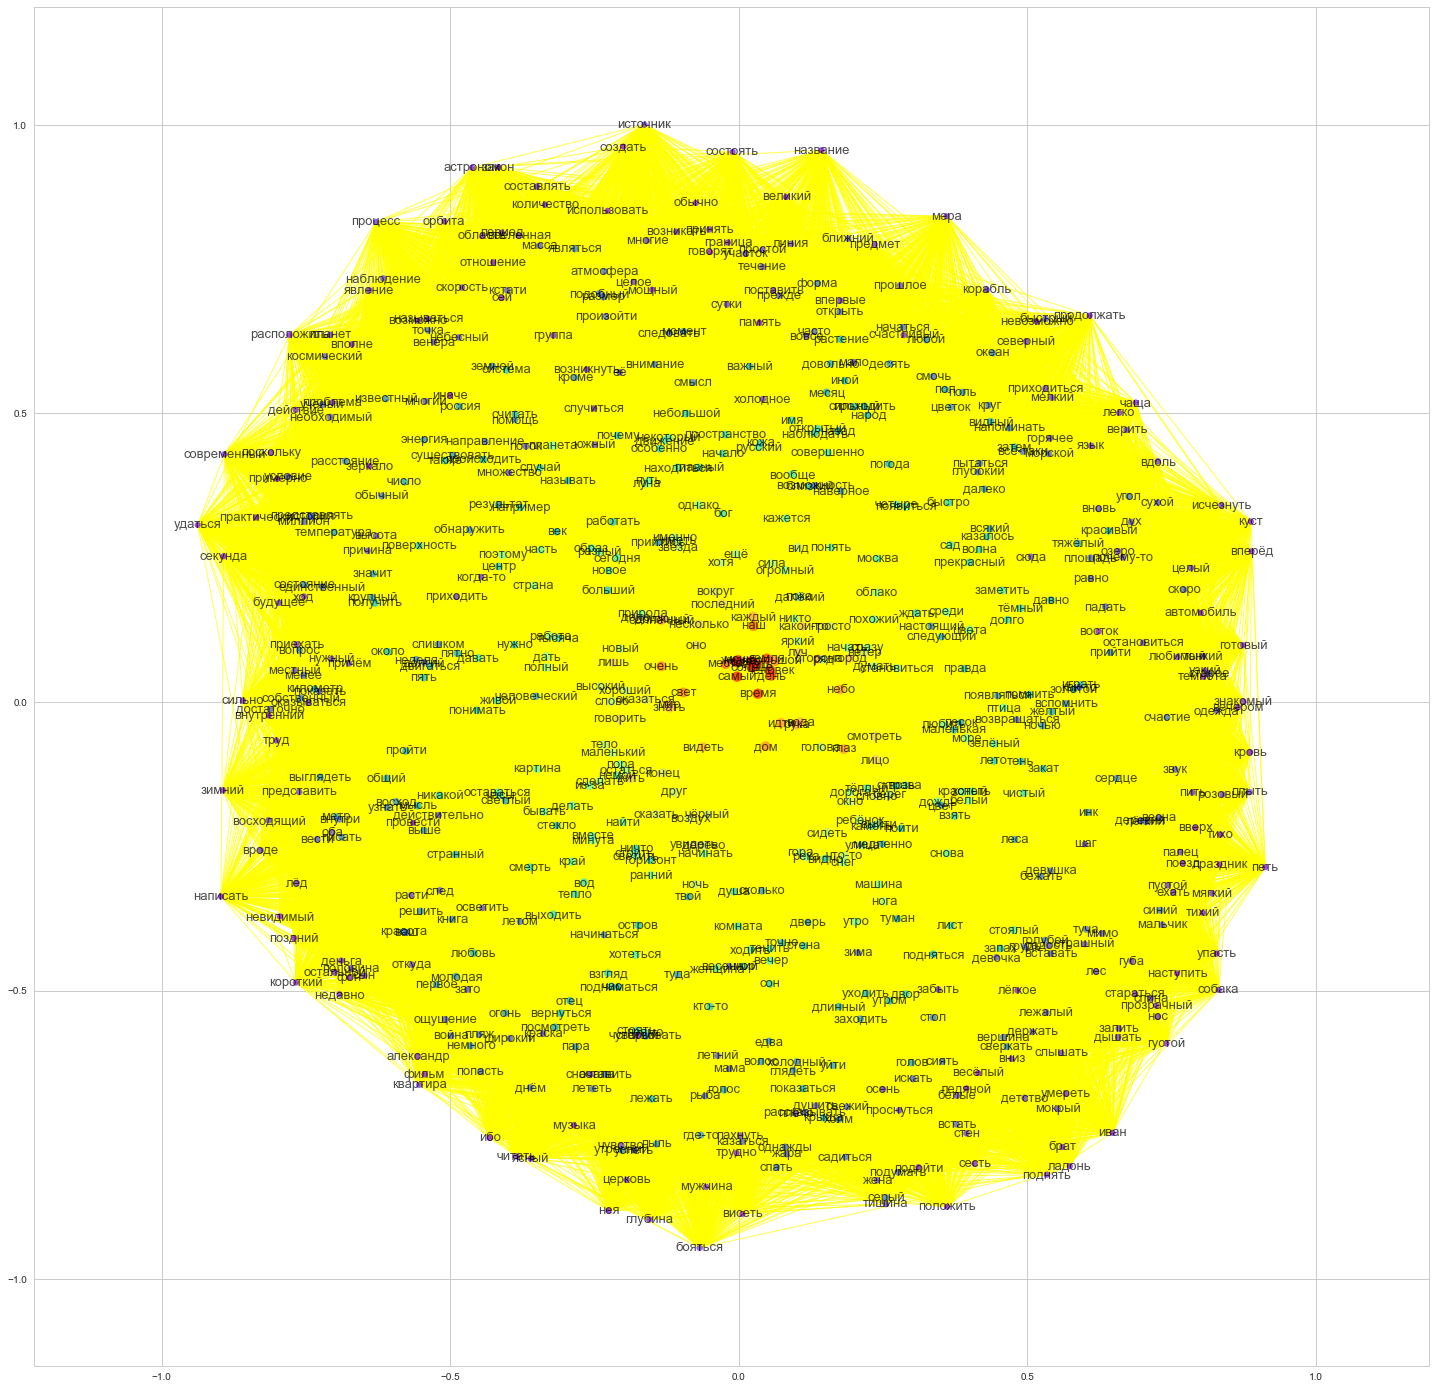

In [21]:
plt.figure(figsize=(25,25))
plt.axis('equal')
nx.draw_networkx(Gkc,with_labels=True,node_size=sizes,node_color = colors,edge_color = "yellow",
                 cmap = plt.cm.rainbow,alpha=0.7, font_size=13)

In [ ]:
ccent_sun = nx.closeness_centrality(Gkc)
ccent_sun_sort = sorted(ccent_sun.items(),reverse=True,key = itemgetter(1))
print(ccent_sun_sort[0:30])

In [ ]:
sizes2 = [x*100 for x in ccent_sun.values()]
colors2 = [float(x) for x in ccent_sun.values()]
plt.figure(figsize=(25,25))
plt.axis('equal')
nx.draw_networkx(Gkc,with_labels=True,node_size=sizes2,node_color = colors2,edge_color = "yellow",
                 cmap = plt.cm.rainbow,alpha=0.7, font_size=13)

In [16]:
def get_central_words(contexts):
    bigrams=list(skipgrams(contexts,2,4))
    G1=nx.Graph()
    G1.add_edges_from(bigrams)
    G1.remove_edges_from(nx.selfloop_edges(G1))
    print (nx.info(G1))
    dcent = nx.degree_centrality(G1)
    dcent_sort = sorted(dcent.items(),reverse=True,key = itemgetter(1))
    definition_list = []
    for pair in dcent_sort[0:50]:
        definition_list.append(pair[0])
    cores=nx.core_number(G1)
    k = max(cores.values())
    print(k)
    print (len(list(nx.k_core(G1,k))))
    return definition_list

In [7]:
def draw_core(G):
    cores=nx.core_number(G)
    k = max(cores.values())
    print(k)
    '''Gkc = G.subgraph(nx.k_core(G,k))
    dcent = nx.degree_centrality(Gkc)
    sizes = [x*100 for x in dcent.values()]
    colors = [float(x) for x in dcent.values()]
    plt.figure(figsize=(25,25))
    plt.axis('equal')
    nx.draw_networkx(Gkc,with_labels=True,node_size=sizes,node_color = colors,edge_color = "yellow",
                     cmap = plt.cm.rainbow,alpha=0.7, font_size=13)'''

In [17]:
fish_list = get_central_words(contexts_fish)
print(fish_list)

Name: 
Type: Graph
Number of nodes: 32125
Number of edges: 833573
Average degree:  51.8956
127
623
['рыба', 'это', 'год', 'время', 'человек', 'вода', 'самый', 'мочь', 'стать', 'наш', 'день', 'большой', 'очень', 'жизнь', 'вид', 'место', 'рука', 'говорить', 'знать', 'каждый', 'дело', 'сказать', 'дом', 'берег', 'несколько', 'идти', 'хороший', 'ловить', 'река', 'мясо', 'жить', 'иметь', 'какой-то', 'слово', 'просто', 'лишь', 'также', 'должный', 'глаз', 'дать', 'работа', 'хотеть', 'хотя', 'делать', 'оказаться', 'пока', 'продукт', 'новый', 'видеть', 'огромный']


In [18]:
tree_list = get_central_words(contexts_tree)
print(tree_list)

Name: 
Type: Graph
Number of nodes: 49019
Number of edges: 1795039
Average degree:  73.2385
233
799
['дерево', 'это', 'год', 'время', 'человек', 'самый', 'дом', 'стать', 'мочь', 'место', 'наш', 'большой', 'земля', 'очень', 'каждый', 'жизнь', 'рука', 'день', 'вид', 'несколько', 'сад', 'город', 'работа', 'идти', 'леса', 'сторона', 'иметь', 'высокий', 'глаз', 'дело', 'ствол', 'растение', 'знать', 'какой-то', 'должный', 'говорить', 'видеть', 'вода', 'сделать', 'ряд', 'лист', 'жить', 'также', 'сказать', 'новый', 'часть', 'увидеть', 'метр', 'дать', 'окно']


In [19]:
stone_list = get_central_words(contexts_stone)
print(stone_list)

Name: 
Type: Graph
Number of nodes: 43143
Number of edges: 1369113
Average degree:  63.4686
180
767
['камень', 'это', 'год', 'человек', 'время', 'стать', 'самый', 'мочь', 'наш', 'рука', 'место', 'дом', 'жизнь', 'земля', 'день', 'большой', 'вода', 'дело', 'очень', 'каждый', 'говорить', 'несколько', 'знать', 'сказать', 'сторона', 'какой-то', 'идти', 'должный', 'вид', 'глаз', 'город', 'работа', 'слово', 'видеть', 'иметь', 'мир', 'сделать', 'новый', 'лишь', 'оказаться', 'просто', 'дерево', 'нога', 'берег', 'последний', 'хотеть', 'хороший', 'россия', 'лицо', 'ребёнок']


In [20]:
salt_list = get_central_words(contexts_salt)
print(salt_list)

Name: 
Type: Graph
Number of nodes: 21524
Number of edges: 399313
Average degree:  37.1040
71
509
['соль', 'это', 'год', 'вода', 'время', 'человек', 'самый', 'стать', 'наш', 'очень', 'мочь', 'день', 'масло', 'большой', '1', 'рука', 'каждый', '2', 'жизнь', 'продукт', 'несколько', 'сказать', 'говорить', 'хороший', 'дом', 'город', 'место', 'иметь', 'высокий', 'делать', 'земля', 'чёрный', 'вид', 'использовать', 'вод', 'также', 'количество', 'перец', 'тело', 'хлеб', 'вещество', 'например', 'организм', 'процесс', '3', 'идти', 'должный', 'лишь', 'затем', 'дать']


In [21]:
sun_list = get_central_words(contexts_sun)
print(sun_list)

Name: 
Type: Graph
Number of nodes: 44941
Number of edges: 1561000
Average degree:  69.4689
215
655
['солнце', 'это', 'год', 'время', 'человек', 'самый', 'земля', 'стать', 'день', 'мочь', 'наш', 'жизнь', 'место', 'рука', 'глаз', 'дом', 'идти', 'вода', 'очень', 'небо', 'большой', 'мир', 'свет', 'каждый', 'солнечный', 'лицо', 'сторона', 'город', 'какой-то', 'видеть', 'говорить', 'знать', 'дело', 'последний', 'вокруг', 'сказать', 'чёрный', 'лишь', 'нога', 'несколько', 'луч', 'увидеть', 'слово', 'окно', 'ветер', 'сидеть', 'должный', 'высокий', 'воздух', 'смотреть']


In [35]:
lists = [fish_list, tree_list, stone_list, salt_list, sun_list]

In [39]:
def filter_list(lists):
    for l in lists:
        for w in l:
            i = 1
            for ll in lists:
                if l == ll:
                    continue
                elif w in ll:
                    i+=1
            if i > 1:
                for lll in lists:
                    try:
                        lll.remove(w)
                    except:
                        print('error remove')
                print(w)
        print(l)
    return lists
                

In [40]:
new_lists = filter_list(lists)

['рыба', 'рука', 'дело', 'дом', 'ловить', 'река', 'мясо', 'дать', 'хотя', 'оказаться', 'пока', 'новый', 'огромный']
['это', 'большой', 'сад', 'работа', 'леса', 'ствол', 'растение', 'какой-то', 'ряд', 'лист', 'жить', 'часть', 'метр']
error remove
error remove
error remove
наш
['камень', 'сторона', 'сделать', 'просто', 'дерево', 'берег', 'россия', 'ребёнок']
['соль', 'мочь', 'масло', '1', 'каждый', '2', 'продукт', 'делать', 'использовать', 'вод', 'также', 'количество', 'перец', 'тело', 'хлеб', 'вещество', 'например', 'организм', 'процесс', '3', 'затем']
['солнце', 'человек', 'земля', 'небо', 'мир', 'свет', 'солнечный', 'лицо', 'видеть', 'последний', 'вокруг', 'нога', 'луч', 'увидеть', 'ветер', 'сидеть', 'высокий', 'воздух', 'смотреть']
